# lab-10_5_1_Advance-cnn(VGG).ipynb
https://github.com/pytorch/vision/blob/master/torchvision/models/vgg.py

In [1]:
import torch
import torch.nn as nn
from typing import Union, List, Dict, Any, cast

In [2]:
__all__ = [
    'VGG', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn',
    'vgg19_bn', 'vgg19',
]

model_urls = {
    'vgg11': 'https://download.pytorch.org/models/vgg11-bbd30ac9.pth',
    'vgg13': 'https://download.pytorch.org/models/vgg13-c768596a.pth',
    'vgg16': 'https://download.pytorch.org/models/vgg16-397923af.pth',
    'vgg19': 'https://download.pytorch.org/models/vgg19-dcbb9e9d.pth',
    'vgg11_bn': 'https://download.pytorch.org/models/vgg11_bn-6002323d.pth',
    'vgg13_bn': 'https://download.pytorch.org/models/vgg13_bn-abd245e5.pth',
    'vgg16_bn': 'https://download.pytorch.org/models/vgg16_bn-6c64b313.pth',
    'vgg19_bn': 'https://download.pytorch.org/models/vgg19_bn-c79401a0.pth',
}

In [3]:
class VGG(nn.Module):

    def __init__(
        self,
        features: nn.Module,
        num_classes: int = 1000,
        init_weights: bool = True
    ) -> None: # return 값
        super(VGG, self).__init__()
        self.features = features # convolution
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),
        ) # FC layer
        if init_weights:
            self._initialize_weights()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x) # convolution
        x = self.avgpool(x)
        x = torch.flatten(x, 1) # x = x.view(x.size(0), -1)
        x = self.classifier(x) # FC layer
        return x

    def _initialize_weights(self) -> None:
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu') # default: 'fan_in', Choosing 'fan_out' preserves the magnitudes in the backwards pass.
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

### function annotation
https://bluese05.tistory.com/78

### flatten 예제
torch.flatten(input, start_dim=0, end_dim=-1) → Tensor

In [4]:
t = torch.tensor([[[1, 2],
                   [3, 4]],
                  [[5, 6],
                   [7, 8]]])
print(t.shape)

torch.Size([2, 2, 2])


In [5]:
t_flatten = torch.flatten(t, start_dim=1)
print(t_flatten)
print(t_flatten.shape)

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
torch.Size([2, 4])


In [6]:
# 'A': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M']
# make_layers(cfgs['A'])

def make_layers(cfg: List[Union[str, int]], batch_norm: bool = False) -> nn.Sequential:
    layers: List[nn.Module] = []
    in_channels = 3
    for v in cfg:
        if v == 'M':
            layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
        else:
            v = cast(int, v) # v를 int로 변환
            conv2d = nn.Conv2d(in_channels, v, kernel_size=3, padding=1)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(v), nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = v
    return nn.Sequential(*layers)

# 64
conv2d = nn.Conv2d(3, 64, kernel_size=3, padding=1)
nn.ReLU(inplace=True)

# 'M'
nn.MaxPool2d(kernel_size=2, stride=2)

# 128
conv2d = nn.Conv2d(64, 128, kernel_size=3, padding=1)
nn.ReLU(inplace=True)

# 'M'
nn.MaxPool2d(kernel_size=2, stride=2)

# 256
conv2d = nn.Conv2d(128, 256, kernel_size=3, padding=1)
nn.ReLU(inplace=True)

# 256
conv2d = nn.Conv2d(256, 256, kernel_size=3, padding=1)
nn.ReLU(inplace=True)

# 'M'
nn.MaxPool2d(kernel_size=2, stride=2)

# 512
conv2d = nn.Conv2d(256, 512, kernel_size=3, padding=1)
nn.ReLU(inplace=True)

# 512
conv2d = nn.Conv2d(512, 512, kernel_size=3, padding=1)
nn.ReLU(inplace=True)

# 'M'
nn.MaxPool2d(kernel_size=2, stride=2)

# 512
conv2d = nn.Conv2d(512, 512, kernel_size=3, padding=1)
nn.ReLU(inplace=True)

# 512
conv2d = nn.Conv2d(512, 512, kernel_size=3, padding=1)
nn.ReLU(inplace=True)

# 'M'
nn.MaxPool2d(kernel_size=2, stride=2)

In [11]:
v = 64
print(type(v))
v = cast(int, v)
print(type(v))

<class 'int'>
<class 'int'>


In [8]:
conv = make_layers(cfgs['A'])
print(conv)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (12): ReLU(inplace=True)
  (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (14): ReLU(inplace=True)
  (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (16): Conv2d(512, 512, kernel_size=(3, 3), stride=

In [14]:
cfgs: Dict[str, List[Union[str, int]]] = {
    'A': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'], # 8 + 3 = 11 -> VGG11
    'B': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'], # 10 + 3 = 13 -> VGG13
    'D': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'], # 13 + 3 = 16 -> VGG16
    'E': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'], # 16 + 3 = 19 -> VGG19
    'custom' : [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 256, 'M', 512, 512, 512, 512, 512, 'M', 512, 512, 512, 512, 512, 'M'], # 19 + 3 = 21
}

In [17]:
conv = make_layers(cfgs['A'], batch_norm=True)
print(conv)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU(inplace=True)
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU(inplace=True)
  (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (13): ReLU(inplace=True)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, cei

In [18]:
CNN = VGG(make_layers(cfgs['custom']), num_classes=10, init_weights=True)

In [19]:
CNN

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

# lab-10_5_2_Aadvance-CNN(VGG_cifar10).ipynb

In [24]:
import torch
import torch.nn as nn

import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

In [25]:
import visdom

vis = visdom.Visdom()
vis.close(env="main")

Setting up a new session...


''

## define loss tracker

In [26]:
def loss_tracker(loss_plot, loss_value, num):
    '''num, loss_value are Tensor'''
    vis.line(X=num,
             Y=loss_value,
             win=loss_plot,
             update='append')

In [27]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('device:', device)

torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

device: cpu


torchvision.transforms.Normalize(mean, std, inplace=False)
* mean (sequence) – Sequence of means for each channel.
* std (sequence) – Sequence of standard deviations for each channel.

In [28]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

trainset = torchvision.datasets.CIFAR10(root='./cifar10', train=True,
                                       download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=512,
                                         shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./cifar10', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=True, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
          'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


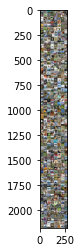

tensor(8)
 ship horse  bird  frog


In [29]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
vis.images(images/2 + 0.5)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(labels[0])
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## make VGG16 using vgg.py

In [30]:
import torchvision.models.vgg as vgg

In [31]:
# 'D': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'] # 13 + 3 = 16 -> VGG16
cfg = [32, 32, 'M', 64, 64, 'M', 128, 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M']

In [32]:
class VGG(nn.Module):

    def __init__(
        self,
        features: nn.Module,
        num_classes: int = 1000,
        init_weights: bool = True
    ) -> None:
        super(VGG, self).__init__()
        self.features = features
#         self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
            nn.Linear(512 * 1 * 1, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),
        )
        if init_weights:
            self._initialize_weights()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
#         x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

    def _initialize_weights(self) -> None:
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

In [33]:
vgg16 = VGG(vgg.make_layers(cfg), 10, True).to(device)

In [34]:
a = torch.Tensor(1, 3, 32, 32).to(device)
out = vgg16(a)
print(out)
print(out.shape)

tensor([[-3.8290e-04, -7.4719e-04, -5.0973e-05,  6.6552e-04,  6.3927e-04,
         -1.6950e-03, -8.7669e-05,  5.8557e-05,  1.4191e-04,  1.4628e-03]],
       grad_fn=<AddmmBackward>)
torch.Size([1, 10])


SGD with momentum  
https://pytorch.org/docs/stable/optim.html

In [35]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(vgg16.parameters(), lr=0.005, momentum=0.9) # SGD with momentum
lr_sche = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.9) # epoch step_size=5번 돌 때마다 lr에 gamma=0.9를 곱함

## make plot

In [36]:
loss_plt = vis.line(Y=torch.Tensor(1).zero_(), opts=dict(title='loss_tracker', legend=['loss'], showlegend=True))

## training

In [37]:
print(len(trainloader))
epochs = 50

for epoch in range(epochs): # loop over the dataset multiple times
    running_loss = 0.0
    lr_sche.step()
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = vgg16(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 30 == 29: # print every 30 mini-batches
            loss_tracker(loss_plt, torch.Tensor([running_loss/30]), torch.Tensor([i + epoch*len(trainloader)]))
            print('[%d, %5d] loss: %.3f' %
                 (epoch + 1, i + 1, running_loss / 30))
            running_loss = 0.0
            
print('Finished Training')

98


C:\Users\leeej\anaconda3\envs\pytorch\lib\site-packages\torch\optim\lr_scheduler.py:131: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


[1,    30] loss: 2.303
[1,    60] loss: 2.303
[1,    90] loss: 2.303
[2,    30] loss: 2.302
[2,    60] loss: 2.303
[2,    90] loss: 2.302
[3,    30] loss: 2.302
[3,    60] loss: 2.302
[3,    90] loss: 2.302
[4,    30] loss: 2.302
[4,    60] loss: 2.302
[4,    90] loss: 2.302
[5,    30] loss: 2.302
[5,    60] loss: 2.302
[5,    90] loss: 2.302
[6,    30] loss: 2.301
[6,    60] loss: 2.301
[6,    90] loss: 2.301
[7,    30] loss: 2.300
[7,    60] loss: 2.299
[7,    90] loss: 2.296
[8,    30] loss: 2.289
[8,    60] loss: 2.265
[8,    90] loss: 2.237
[9,    30] loss: 2.183
[9,    60] loss: 2.170
[9,    90] loss: 2.148
[10,    30] loss: 2.135
[10,    60] loss: 2.116
[10,    90] loss: 2.108
[11,    30] loss: 2.092
[11,    60] loss: 2.071
[11,    90] loss: 2.052
[12,    30] loss: 2.025
[12,    60] loss: 2.014
[12,    90] loss: 1.975
[13,    30] loss: 1.951
[13,    60] loss: 1.933
[13,    90] loss: 1.909
[14,    30] loss: 1.896
[14,    60] loss: 1.884
[14,    90] loss: 1.849
[15,    30] loss: 1

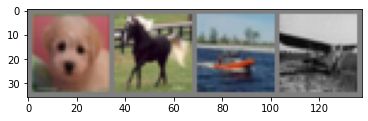

GroundTruth:    doghorse shipplane


In [38]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ''.join('%5s' % classes[labels[j]] for j in range(4)))

In [39]:
outputs = vgg16(images.to(device))

In [40]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    dog horse plane plane


In [41]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = vgg16(images)
        
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        
        correct += (predicted == labels).sum().item()
        
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 71 %
